In [21]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

,trip_id,arrival_time_x,departure_time_x,stop_id,stop_sequence_x,route_id,service_id,wheelchair_accessible,agency_id,route_short_name,route_long_name,route_type,arrival_time_y,departure_time_y,stop_sequence_y,diff
0,1_020_1_0338,03:55:00,03:55:00,7091_07,1,1,1,1,ZTM,1,Annopol,0,03:55:24,03:55:24,1,24.0


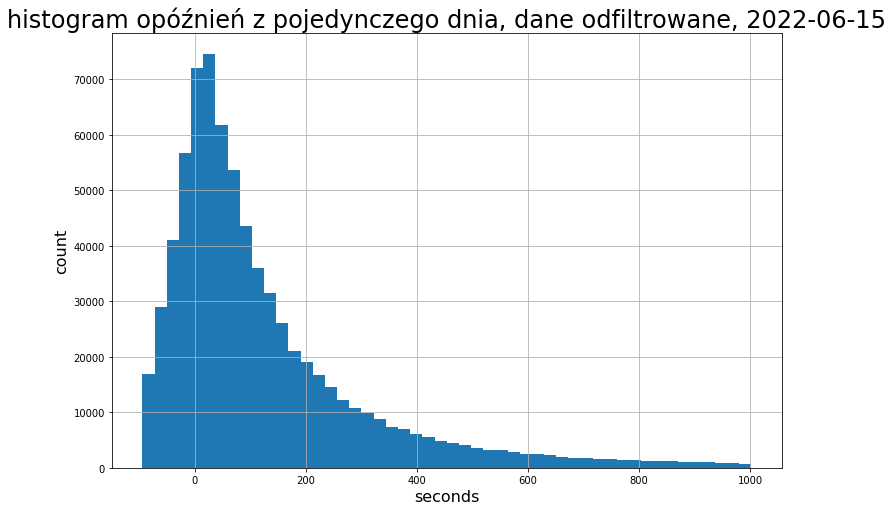

In [8]:
# directory = "../dane/gtfs-drive/"
directory = "../dane/gtfs-drive/"
filepath = directory + '2023-06-15' # konkretny plik wybieramy
extension = ".gtfs"
routes_df = pd.read_csv(filepath + extension + "/routes.txt")
stop_times_df = pd.read_csv(filepath + extension + "/stop_times.txt")
trips_df = pd.read_csv(filepath + extension + "/trips.txt")
rt_stop_times_df = pd.read_csv(filepath + '-rt.gtfs/stop_times.txt')
merged_df = stop_times_df.merge(trips_df, on = 'trip_id').merge(routes_df, on = 'route_id').merge(rt_stop_times_df, on=['trip_id', 'stop_id'])
merged_df['arrival_time_x'] = merged_df['arrival_time_x'].str.strip()
merged_df['arrival_time_y'] = merged_df['arrival_time_y'].str.strip()

# Create the past_midnight column

merged_df['diff'] = pd.to_timedelta(merged_df['arrival_time_y'], errors='coerce') - pd.to_timedelta(merged_df['arrival_time_x'], errors='coerce')
merged_df['diff'] = merged_df['diff'].apply(lambda x: pd.Timedelta.total_seconds(x))


lower_quantile = merged_df['diff'].quantile(0.025)
upper_quantile = merged_df['diff'].quantile(0.975)
# Filter the dataframe to keep values within the 2.5% - 97.5% range
filtered_df = merged_df[(merged_df['diff'] >= lower_quantile) & (merged_df['diff'] <= upper_quantile)]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,8)
filtered_df['diff'].hist(ax=ax, bins = 50)
ax.set_title(f'histogram opóźnień z pojedynczego dnia, dane odfiltrowane, {day}', fontsize = 24)
ax.set_xlabel('seconds', fontsize = 16)
ax.set_ylabel('count', fontsize = 16)
filtered_df.head(1)

In [22]:
ecdfs = []
for line in filtered_df['route_short_name'].unique():
    sample = filtered_df[filtered_df['route_short_name'] == line]
    sample = sample['diff']
    ecdfs.append(stats.ecdf(sample))

AttributeError: module 'scipy.stats' has no attribute 'ecdf'

In [23]:
from scipy import stats
from scipy.stats import ecdf

ImportError: cannot import name 'ecdf' from 'scipy.stats' (C:\Users\mipec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\__init__.py)